In [43]:
from matplotlib.pyplot import *
import numpy as np
from Functions_6_24 import *
import itertools
import astropy.units as u
import astropy.constants as const
import time

In [81]:
grid_ranges = {}
grid_ranges['tage'] = np.linspace(7,9,1)
grid_ranges['dust2'] = np.linspace(0,3,1)
grid_ranges['logzsol'] = np.linspace(-1,.5,1)

run_params = {}
run_params['zred'] = 3.548
run_params['mass'] = 1e8
run_params['add_duste'] = False
run_params['zcontinuous'] = 1

In [82]:
obs = getObs(**run_params)
sps = getSps(**run_params)
wspec, wphot = getWave(obs=obs,sps=sps,**run_params)

In [83]:
data_grid_params = np.empty((len(grid_ranges['tage']),len(grid_ranges['dust2']),len(grid_ranges['logzsol']),5))
data_grid_spec = np.empty((len(grid_ranges['tage']),len(grid_ranges['dust2']),len(grid_ranges['logzsol']),len(wspec)))
data_grid_phot = np.empty((len(grid_ranges['tage']),len(grid_ranges['dust2']),len(grid_ranges['logzsol']),len(wphot)))

In [141]:
from prospect.models.sedmodel import SedModel
from prospect.models.templates import TemplateLibrary
modelp0 = TemplateLibrary['parametric_sfh']
# modelp0, model

# This is the order of the model object ->
# i.e. the order that the model.free_params list will be in for plotting:
# [zred, mass, logzsol, dust2, tage]

In [84]:
for i_tage,i_dust,i_logz in itertools.product(range(len(grid_ranges['tage'])),range(len(grid_ranges['dust2'])),range(len(grid_ranges['logzsol']))):
    
    tage = grid_ranges['tage'][i_tage]
    dust = grid_ranges['tage'][i_dust]
    logz = grid_ranges['tage'][i_logz]

    run_params['tage'] = tage
    run_params['dust2'] = dust
    run_params['logzsol'] = logz

    model = getModel(**run_params)
    
    init_spec, init_phot, init_mfrac = getTheta(model, obs, sps)

    flux_density_phot = []
    for wave,mag in zip(wphot,init_phot):
        jy = mag*3631.0 * u.Jy
        flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*u.AA))
        flux_density_phot.append(flux.value*10**20)

    flux_density_spec = []
    for wave,mag in zip(wspec,init_spec):
        jy = mag*3631.0 * u.Jy
        flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*u.AA))
        flux_density_spec.append(flux.value*10**20)

    data_grid_params[i_tage, i_dust, i_logz, :] = [run_params['mass'], run_params['zred'], tage, dust, logz]
    data_grid_spec[i_tage, i_dust, i_logz, :] = flux_density_spec
    data_grid_phot[i_tage, i_dust, i_logz, :] = flux_density_phot

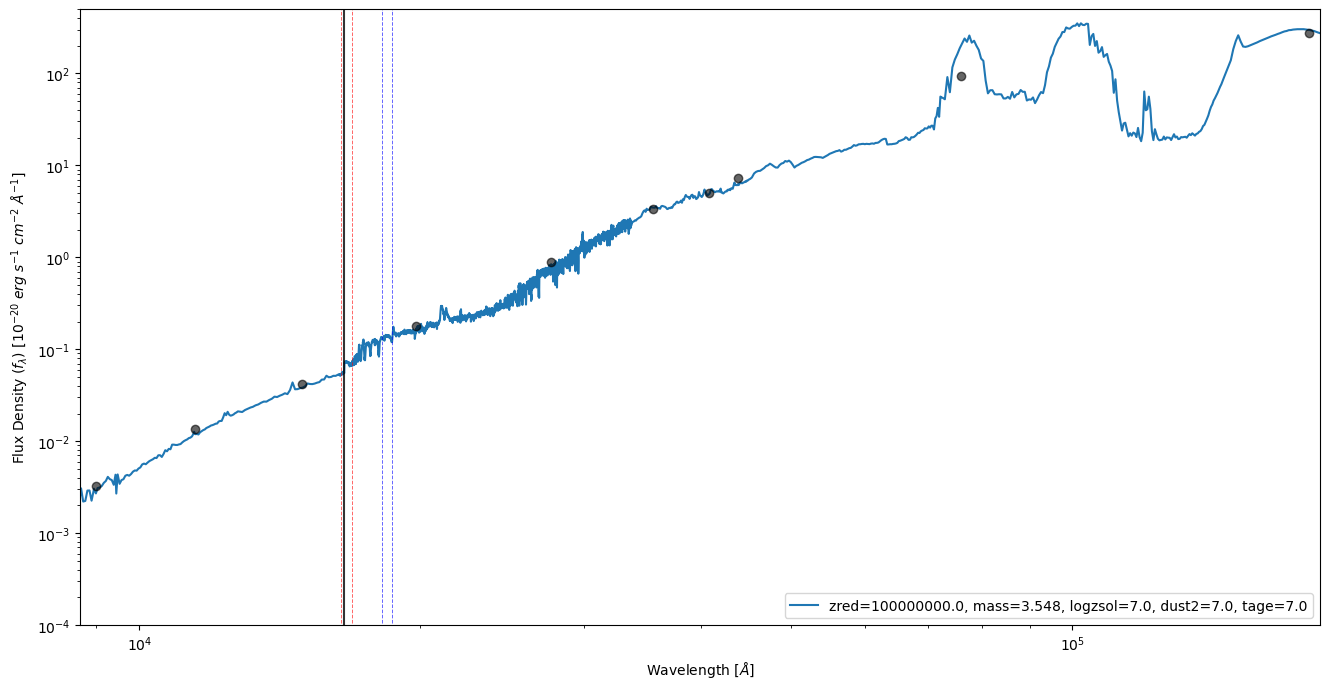

In [133]:
figure(figsize=(16,8))

loglog(wspec,data_grid_spec[0,0,0,:],label=', '.join(["{}={}".format(p,data_grid_params[i_tage,i_dust,i_logz,:][i]) for i,p in zip(range(5),model.free_params)]))
plot(wphot,data_grid_phot[0,0,0,:], ls='', marker='o', color='black', alpha=0.6)

plotBalmerBreak(**run_params)

xlim([(1900)*(1+z),(40500)*(1+z)])
ylim([1e-4,5e2])

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density ($f_\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')

legend()

show()

--------------

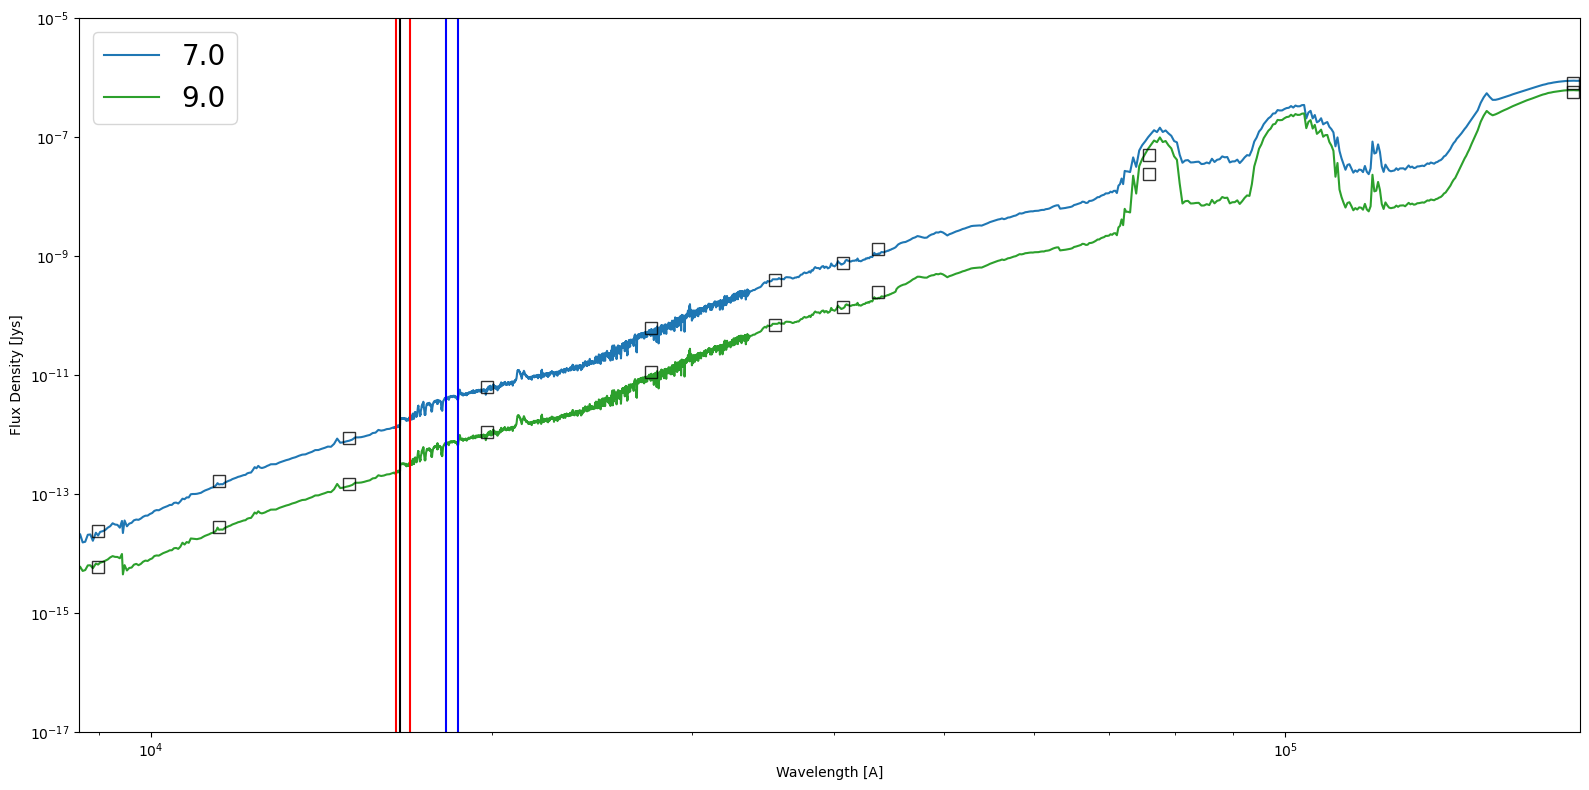

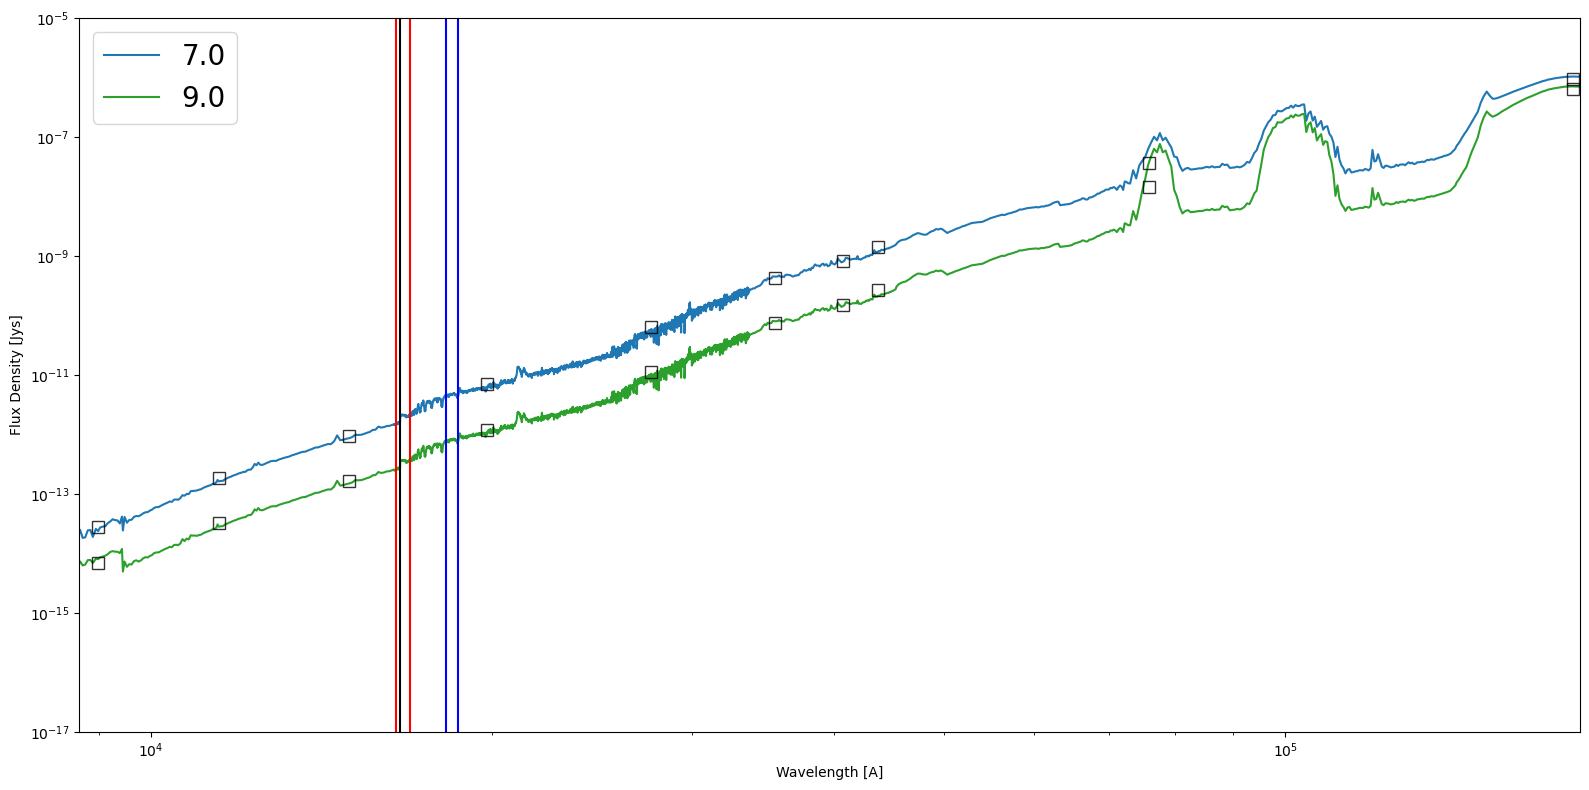

In [215]:
# init_spec = data_grid_spec[0,0,0,:]
# init_phot = data_grid_phot[0,0,0,:]

i_dust = 0
i_logz = 0

a = 1.0 + run_params['zred']

balmer = np.ones(50)*3646*a

lower_1 = np.ones(50)*3620*a
upper_1 = np.ones(50)*3720*a

lower_2 = np.ones(50)*4000*a
upper_2 = np.ones(50)*4100*a

y = np.linspace(0,4e3,50)


title_text = ','.join(["{}={}".format(p,model.params[p][0]) for p in model.free_params])

a = 1.0 + model.params.get('zred', 0.0)

# xmin, xmax = np.min(wphot)*0.8, np.max(wphot)/0.8
# xmin, xmax = 3646-10**2, 3646+10**2
# temp = np.interp(np.linspace(xmin,xmax,10000), wspec, init_spec)
# ymin, ymax = temp.min()*0.8, temp.max()/0.4

for i_logz in range(len(grid_ranges['logzsol'])):

    figure(figsize=(16,8))

    for i_tage in range(len(grid_ranges['tage'])):
        loglog(wspec, data_grid_spec[i_tage,i_dust,i_logz,:], label='{}'.format(grid_ranges['tage'][i_tage]))
        errorbar(wphot, data_grid_phot[i_tage,i_dust,i_logz,:], marker='s', ls='', markerfacecolor='none',
                 markeredgecolor='black', alpha=0.8, markersize=8)

    plot(x,y,color='black')
    plot(x1,y,color='red')
    plot(x2,y,color='red')
    plot(x3,y,color='blue')
    plot(x4,y,color='blue')

    xlabel('Wavelength [A]')
    ylabel('Flux Density [Jys]')
    z = run_params['zred']
    xlim([(1900)*(1+z),(40000)*(1+z)])
    ylim([1e-17,1e-5])
    legend(fontsize=20)
    tight_layout()

# plot(x,y,color='black')
# plot(x1,y,color='red')
# plot(x2,y,color='red')
# plot(x3,y,color='blue')
# plot(x4,y,color='blue')

# title(title_text)

# xlabel('Wavelength [A]')
# ylabel('Flux Density [Jys]')
# z = run_params['zred']
# xlim([(1900)*(1+z),(40000)*(1+z)])
# ylim([1e-17,1e-5])
# legend(fontsize=20)
# tight_layout()

show()

In [207]:
wspec[wspec>3620]
n = 0
for s in wspec>3620:
    if s:
        # print(s, n)
        break
    n+=1

n = 0
for s in wspec<3720:
    if not s:
        # print(s, n)
        break
    n+=1

# plot(wspec[111:113], init_spec[111:113], 'o')

np.mean(wspec[111:113])

data_grid_spec[i_tage,i_dust,i_logz,:].shape, wspec.shape

((5994,), (5994,))

In [47]:
flux_density_phot = []

import time

start = time.time()

for wave,mag in zip(wphot,data_grid_phot[0,0,0,:]):
    jy = mag*3631.0 * u.Jy
    flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave*u.AA))
    flux_density_phot.append(flux.value*10**20)

# test_phot = [((m*3631*u.Jy).to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(w*u.AA))).value*10**20 for w,m in zip(wphot,data_grid_phot[0,0,0,:])]
# test_spec = [((m*3631*u.Jy).to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(w*u.AA))).value*10**20 for w,m in zip(wspec,data_grid_spec[0,0,0,:])]

flux_density_spec = []

for wave,mag in zip(wspec,data_grid_spec[0,0,0,:]):
    wave *= u.AA
    jy = mag*3631.0 * u.Jy
    flux = jy.to(u.erg / u.cm**2 / u.s / u.AA, equivalencies=u.spectral_density(wave))
    flux_density_spec.append(flux.value*10**20)

end = time.time()
print(end-start)

4.831845045089722


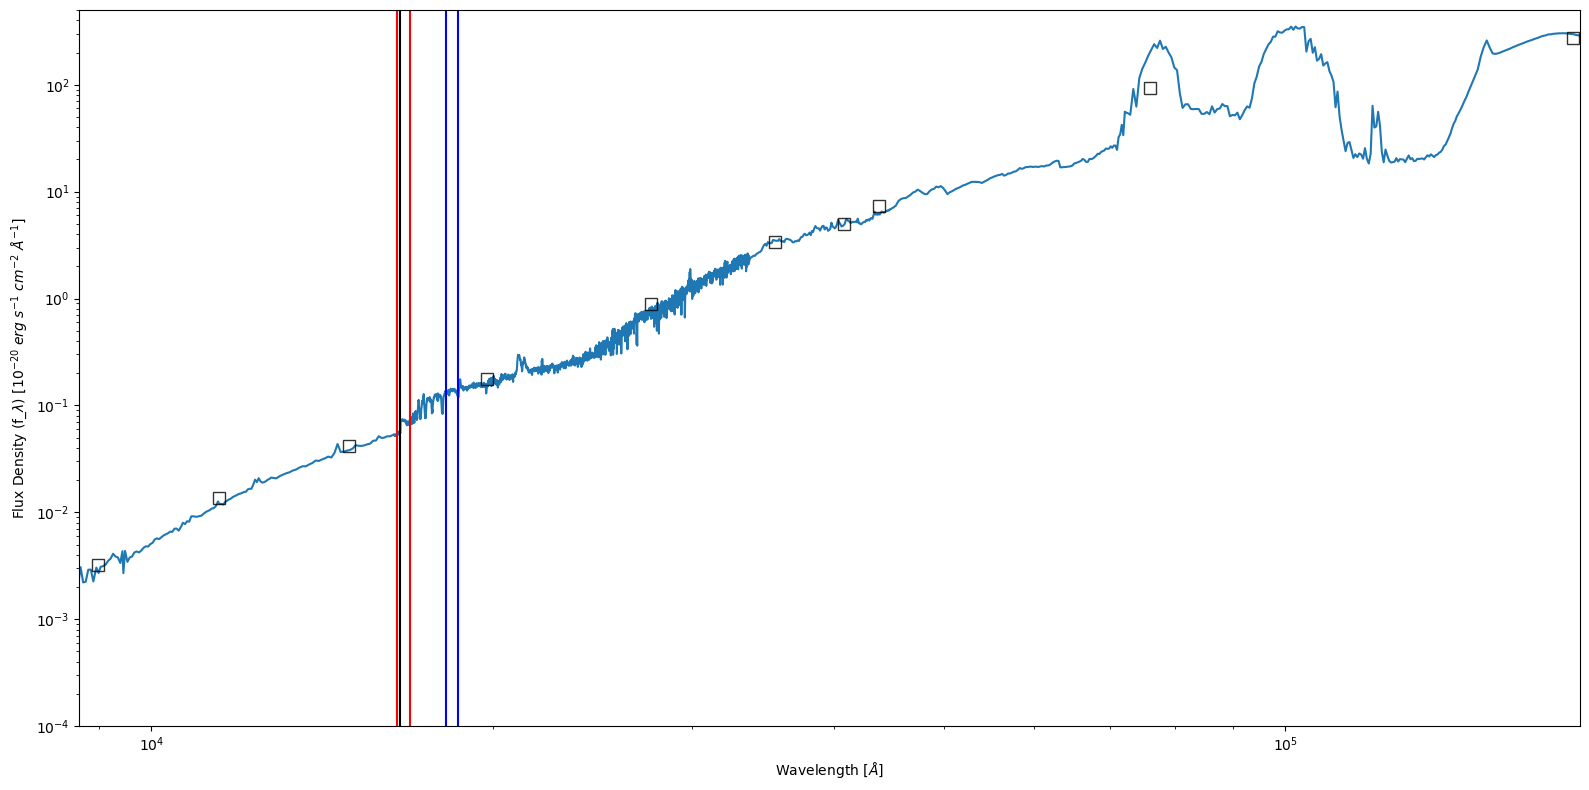

In [80]:
figure(figsize=(16,8))

loglog(wspec, flux_density_spec)
errorbar(wphot, flux_density_phot, marker='s', ls='', markerfacecolor='none',
         markeredgecolor='black', alpha=0.8, markersize=8)

plotBalmerBreak(**run_params)

xlabel(r'Wavelength [$\AA$]')
ylabel(r'Flux Density (f_$\lambda$) [$10^{-20}$ $erg$ $s^{-1}$ $cm^{-2}$ $\AA^{-1}$]')
z = run_params['zred']
xlim([(1900)*(1+z),(40000)*(1+z)])
ylim([1e-4,5e2])
tight_layout()

show()

-----------------------

In [5]:
# DOUBLE CHECK WHEN PLOTTING ###########################################################################

# Make sure logzsol prior maxi=0.19 does not impact inputted metallicity maxi=0.5
# Make sure dust2 prior maxi=2.0 does not impact inputted dust2 maxi=3.0
########################################################################################################